In [ ]:
pip install ucimlrepo

In [ ]:
!pip install ydata-profiling optuna-integration

## Mount GDrive




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
import joblib

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
#from ydata_profiling import ProfileReport

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

#import optuna
#from optuna.integration import OptunaSearchCV
#from optuna.distributions import (
#    IntDistribution ,
#    CategoricalDistribution,
#    FloatDistribution,
#)

In [ ]:
from sklearn import set_config

# Set sklearn to show diagrams for pipelines
set_config(display='diagram')

## Import for UCIDATASET poi lo caricherò su github

### Informazioni utili: https://archive.ics.uci.edu/static/public/755/data.csv - dataset


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
accelerometer_gyro_mobile_phone = fetch_ucirepo(id=755)

# data (as pandas dataframes)
X = accelerometer_gyro_mobile_phone.data.features
y = accelerometer_gyro_mobile_phone.data.targets

# metadata
print(accelerometer_gyro_mobile_phone.metadata)

# variable information
print(accelerometer_gyro_mobile_phone.variables)


{'uci_id': 755, 'name': 'Accelerometer Gyro Mobile Phone', 'repository_url': 'https://archive.ics.uci.edu/dataset/755/accelerometer+gyro+mobile+phone+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/755/data.csv', 'abstract': 'data collected on 2022, in King Saud University in riyadh for recognizing human activities using mobile phone IMU sensors (Accelerometer, and Gyroscope). these activity is calssified to standing(stop), or walking.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Sequential', 'Multivariate', 'Time-Series'], 'num_instances': 31991, 'num_features': 8, 'feature_types': ['Real', 'Categorical'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2022, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': 'https://doi.org/10.3390/s22176513', 'creators': ['Abdullah AlSahly'], 'intro_paper': {'ID': 155, 'type': 'NATIVE', 'tit

## Analizzo brevemente con pandas

In [ ]:
# https://archive.ics.uci.edu/static/public/755/data.csv
mobile_acc_gyro_data = pd.read_csv('https://raw.githubusercontent.com/FornOmega/Human-activity-recognition-using-mobile-phone-IMU-sensors/main/dataset/accelerometer_gyro_mobile_phone_dataset.csv', sep=",")

In [ ]:
mobile_acc_gyro_data
# 6 feature numeriche - continue
# 1 feature categorica --> timestamp ma irrilevante ai fini del Learning
# Idee possibili: ANN, Ensemble: provarli vari, randomForest e decisiontrees, ci starebbe xgboost, gradient boosting e adaboost magari, REGRESSIONE però --> LOGISTICREGRESSION ... , SVM anche!!!!! (numeriche)

# Activity	Feature	Integer (1 = walking, 0 = standing(stop)) da predirre - prevedere - imparare ad approssimare ; classificazione BINARIA da salvare poi come 1 o 0 o ANN numero comunque - vaalore numerico ma non qualunque solo 0 o 1

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1
...,...,...,...,...,...,...,...,...
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1


In [ ]:
mobile_acc_gyro_data.dtypes

,0
accX,float64
accY,float64
accZ,float64
gyroX,float64
gyroY,float64
gyroZ,float64
timestamp,object
Activity,int64


In [ ]:
mobile_acc_gyro_data.nunique()

# timestamp irrilevante

,0
accX,15343
accY,18753
accZ,23353
gyroX,31097
gyroY,31048
gyroZ,31063
timestamp,21776
Activity,2


In [ ]:
mobile_acc_gyro_data.describe()

#31991 come descritto 31991 nella "repository"

#  infatti il timeStamp me lo toglie è irrilevante

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [ ]:
mobile_acc_gyro_data.count()

,0
accX,31991
accY,31991
accZ,31991
gyroX,31991
gyroY,31991
gyroZ,31991
timestamp,31991
Activity,31991


In [ ]:
mobile_acc_gyro_data_activity1=mobile_acc_gyro_data['Activity']
# check
print(mobile_acc_gyro_data_activity1)

0        1
1        1
2        1
3        1
4        1
        ..
31986    1
31987    1
31988    1
31989    1
31990    1
Name: Activity, Length: 31991, dtype: int64


In [ ]:
mobile_acc_gyro_data.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [ ]:
mobile_acc_gyro_data.tail()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
31986,-0.488734,1.610800,10.610386,0.079187,-0.174218,-0.050365,03:15.1,1
31987,-0.049397,2.769092,7.008276,-0.083853,0.007656,-0.045658,03:15.2,1
31988,0.291294,3.002007,6.732400,0.005984,-0.058994,-0.087044,03:15.3,1
31989,0.256267,4.069138,8.687933,0.061487,-0.016278,-0.088728,03:15.4,1
31990,0.646356,5.273683,10.216704,-0.142294,-0.000884,0.048970,03:15.5,1


In [ ]:
mobile_acc_gyro_data.loc[3000:3500]

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
3000,-0.617466,1.946702,7.529193,-0.022493,-0.034176,0.356435,57:45.7,1
3001,-0.387394,3.026706,6.065237,0.067276,-0.010266,0.332784,57:45.8,1
3002,-0.451162,3.863616,8.955726,0.022102,-0.316728,0.091901,57:45.9,1
3003,-0.394280,3.390599,11.399245,-0.168825,0.114916,-0.251832,57:46.0,1
3004,0.386047,1.409918,12.170891,-0.766871,0.179139,-0.620699,57:46.1,1
...,...,...,...,...,...,...,...,...
3496,-0.284558,1.476380,11.978391,0.043297,-0.095914,0.320829,00:46.5,1
3497,0.940195,1.856739,9.507778,0.123528,-0.110964,-0.034103,00:46.6,1
3498,-0.052092,2.962939,6.795868,-0.179473,0.256307,-0.669218,00:46.7,1
3499,-0.086071,3.392545,7.985294,0.036440,0.019684,-0.459049,00:46.8,1


In [ ]:
len(mobile_acc_gyro_data[mobile_acc_gyro_data['Activity']==0])

571

In [ ]:
mobile_acc_gyro_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
31986,False
31987,False
31988,False
31989,False


In [ ]:
# count of duplicated row on entire dataaset
len(mobile_acc_gyro_data)-len(mobile_acc_gyro_data.drop_duplicates())

144

In [ ]:
# Missing values conteggio
mobile_acc_gyro_data.isnull().sum().sum()

0

# Data Analysis and Preprocessing

In [ ]:
# Creo il dataset senza timestamp (dati superflui)

notime_mobile_acc_gyro_data = mobile_acc_gyro_data.drop(columns="timestamp")

## Data Visualization

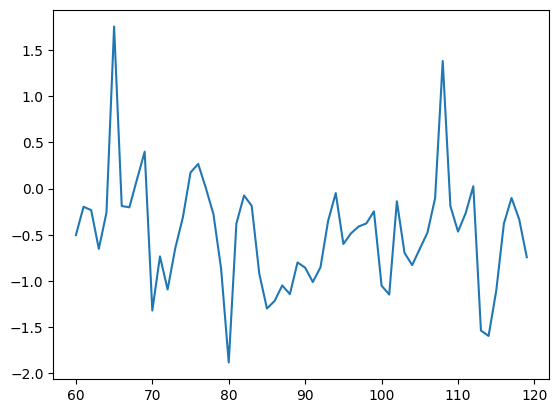

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["accX"][60:120])

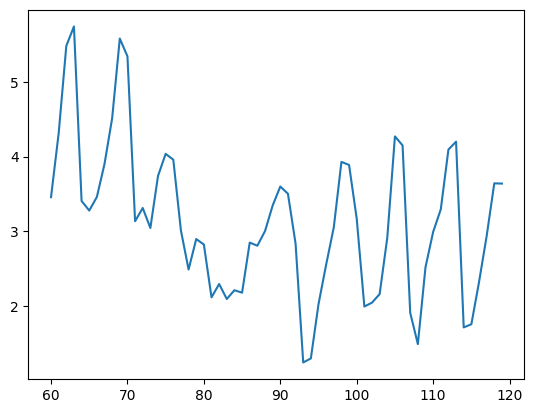

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["accY"][60:120])

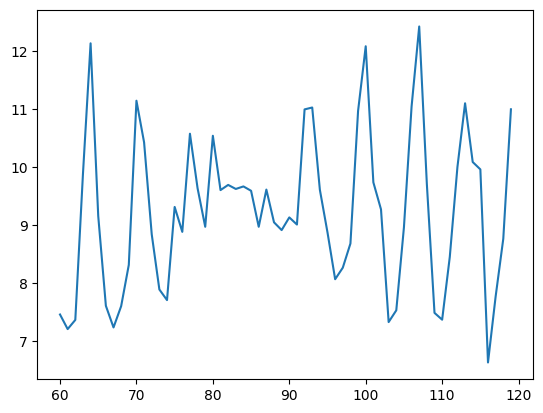

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["accZ"][60:120])

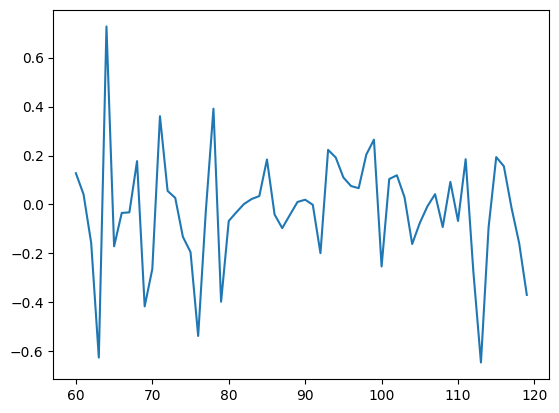

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["gyroX"][60:120])

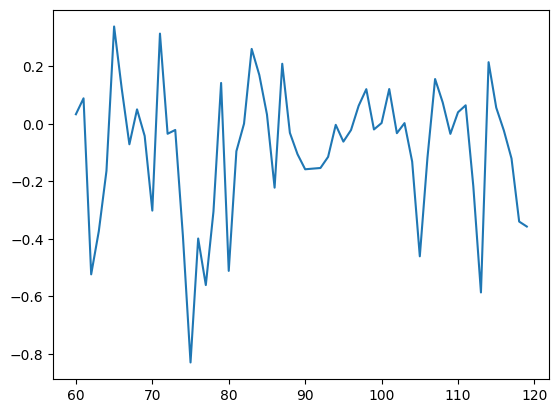

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["gyroY"][60:120])

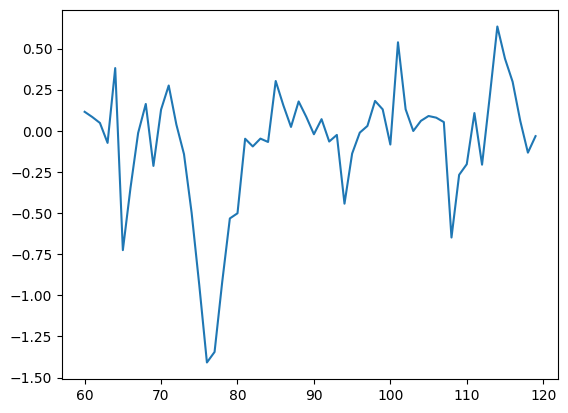

In [ ]:
plt.plot(notime_mobile_acc_gyro_data["gyroZ"][60:120])

In [ ]:
def plot_pie_values_col(ds: pd.DataFrame, column: str, title: str):
    """
    Plotta una pie chart basata sui valori di una colonna specifica di un DataFrame.
    """
    value_counts = ds[column].value_counts()
    filtered_values = value_counts[value_counts > 3]

    # Plotta la pie chart
    filtered_values.plot.pie(figsize=(8, 6), autopct="%1.1f%%")

    # Aggiungi il titolo
    plt.title(title, fontsize=14)
    plt.ylabel('')  # Rimuove l'etichetta assegnata automaticamente
    plt.show()

In [ ]:
mobile_acc_gyro_data[mobile_acc_gyro_data['Activity']==0]

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
20923,-0.396525,0.550405,9.576037,0.009053,-0.042808,0.023791,05:47.5,0
20924,-0.460742,0.555046,10.204579,-0.030913,-0.014605,0.048749,05:47.6,0
20925,-0.238005,0.727936,9.533675,0.049909,-0.014274,-0.001371,05:47.7,0
20926,-0.413889,0.798290,9.709409,0.020137,0.019136,0.021809,05:47.8,0
20927,-0.445174,0.812959,9.782757,0.016075,-0.002261,0.023203,05:47.9,0
...,...,...,...,...,...,...,...,...
21947,-0.619113,1.714086,9.753567,-0.120803,0.161252,-0.851049,07:30.1,0
21948,-0.706980,1.952240,9.356144,-0.128203,0.090803,-0.324165,07:30.2,0
21949,-0.066162,2.509531,9.760603,0.294427,-0.115590,0.114325,07:30.3,0
21950,-1.192271,0.716560,11.704460,-0.075514,0.608212,0.101588,07:30.4,0


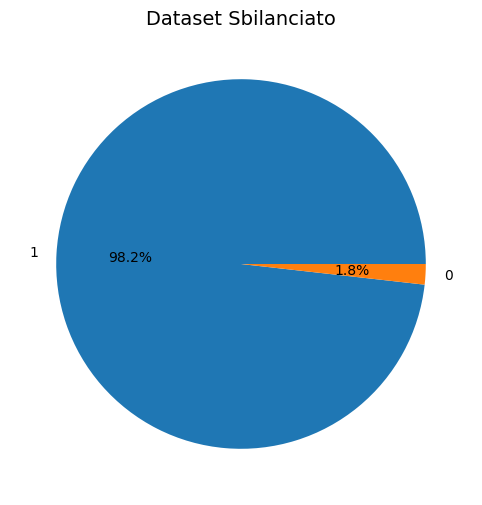

In [ ]:
# Visualizzazione del dataset sbilanciato

plot_pie_values_col(ds=notime_mobile_acc_gyro_data, column="Activity", title="Dataset Sbilanciato")

In [ ]:
print("Lunghezza dataset non bilanciato: " + str(len(notime_mobile_acc_gyro_data)) + " elementi.")

Lunghezza dataset non bilanciato: 31991 elementi.


# PULIZIA DEL DATASET:

## Filtraggio dati - paper

SMOOTHING DEI DATI con Butterworth highpass e lowpass filter


The Mahony complementary filter (MCF) can be used to correct gyro data,
and a low-pass filter (LPF) and high-pass filter (HPF) can be used to overcome accelerometer
(acce) and gyroscope (gyro) data spikes, respectively. The Mahony complementary filter
(MCF) can be used to compute the heading angle, as it utilizes gyroscope data to calculate
the carrier attitude, and does not result in error accumulation. Use acce and magnetometer
(mag) data, the MCF corrects the gyro error (as shown in Equations (5) and (6)), and all
sensor data are considered to lie in 3-dimensional space:

In [ ]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Function to design a high-pass filter (Butterworth filter)
def butter_highpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Function to apply the high-pass filter to data
def highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order)
    return filtfilt(b, a, data)  # Apply the filter (zero-phase filtering)

# Parameters for the high-pass filter
fs = 50  # Sampling frequency (Hz)
cutoff = 0.1  # Cutoff frequency for the high-pass filter (Hz)

# Apply high-pass filter to the accelerometer data (accX, accY, accZ)
gyroX_filtered = highpass_filter(notime_mobile_acc_gyro_data['gyroX'].values, cutoff, fs)
gyroY_filtered = highpass_filter(notime_mobile_acc_gyro_data['gyroY'].values, cutoff, fs)
gyroZ_filtered = highpass_filter(notime_mobile_acc_gyro_data['gyroZ'].values, cutoff, fs)

notime_mobile_acc_gyro_data['gyroX'] = gyroX_filtered
notime_mobile_acc_gyro_data['gyroY'] = gyroY_filtered
notime_mobile_acc_gyro_data['gyroZ'] = gyroZ_filtered

In [ ]:
# Function to design a low-pass filter
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Function to apply the low-pass filter
def lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, data)  # Apply the filter (zero-phase filtering)

lowpass_cutoff = 5.0  # Cutoff frequency for low-pass filter (Hz)

accX_lowpass = lowpass_filter(notime_mobile_acc_gyro_data['accX'].values, lowpass_cutoff, fs)
accY_lowpass = lowpass_filter(notime_mobile_acc_gyro_data['accY'].values, lowpass_cutoff, fs)
accZ_lowpass = lowpass_filter(notime_mobile_acc_gyro_data['accZ'].values, lowpass_cutoff, fs)

notime_mobile_acc_gyro_data['accX'] = accX_lowpass
notime_mobile_acc_gyro_data['accY'] = accY_lowpass
notime_mobile_acc_gyro_data['accZ'] = accZ_lowpass

## RIMOZIONE DEGLI OUTLIERS

In [ ]:
# rimozione outliers

def detect_outliers_std(data, columns, threshold=3):
    """
    Identifica gli outlier in più colonne basandosi sulla deviazione standard.

    Parametri:
    - data: pd.DataFrame -> Il dataset.
    - columns: list -> Lista delle colonne da analizzare.
    - threshold: int -> Numero di deviazioni standard per considerare un valore un outlier.

    Restituisce:
    - Un DataFrame con una colonna aggiuntiva 'outlier' che indica True per gli outlier.
    """
    outlier_flags = pd.DataFrame(index=data.index)

    for column in columns:
        mean = data[column].mean()
        std = data[column].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        # Flagga gli outlier per questa colonna
        outlier_flags[column] = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Combina i flag
    data['outlier'] = outlier_flags.any(axis=1)
    return data

# Esempio di utilizzo
outlier_data = detect_outliers_std(notime_mobile_acc_gyro_data, columns=['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ'])
outliers = outlier_data[outlier_data['outlier']]

outlier_indices = outliers.index

no_outliers_dataset = notime_mobile_acc_gyro_data.drop(outlier_indices)
cleaned_no_outliers_dataset=no_outliers_dataset.drop(columns="outlier")
print("Lunghezza dataset dopo aver rimosso gli outliers: " + str(len(cleaned_no_outliers_dataset)) + " elementi.")

Lunghezza dataset dopo aver rimosso gli outliers: 30748 elementi.


In [ ]:
cleaned_no_outliers_dataset

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
0,-0.495542,3.772175,8.942803,0.077919,-0.059980,-0.069828,1
1,-0.472844,3.779725,8.925968,0.303310,0.162782,0.045575,1
2,-0.478965,3.819924,8.885047,0.278917,0.117536,0.025464,1
3,-0.532477,3.913140,8.807363,0.222988,0.094577,0.064341,1
4,-0.633662,4.065967,8.701690,0.089901,0.164859,0.007581,1
...,...,...,...,...,...,...,...
31985,0.343875,2.081185,9.518313,0.179109,-0.143487,-0.174863,1
31986,0.234059,2.160259,9.411686,0.121176,-0.242514,-0.191883,1
31987,0.203845,2.545579,9.367881,-0.043443,-0.063868,-0.192896,1
31988,0.273466,3.241579,9.480716,0.044771,-0.133802,-0.240104,1


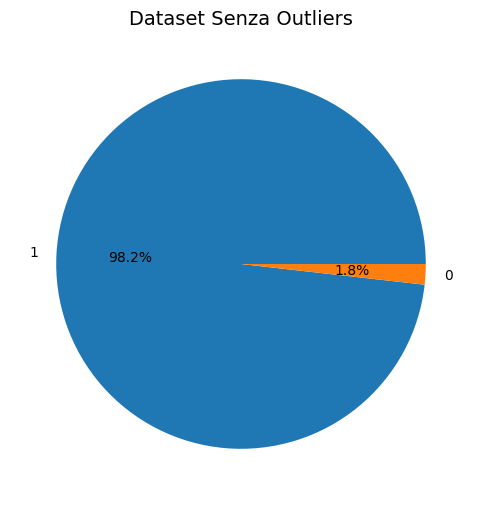

In [ ]:
plot_pie_values_col(ds=cleaned_no_outliers_dataset, column="Activity", title="Dataset Senza Outliers")

# FEATURE ENGINEERING



In [ ]:
from sklearn.preprocessing import StandardScaler

print("improve me, please add magnitude")

# Creazione di un oggetto StandardScaler
scaler = StandardScaler()

# Standardizzare i dati (escludendo la colonna target se presente)
cleaned_no_outliers_standardized = pd.DataFrame(scaler.fit_transform(cleaned_no_outliers_dataset), columns=cleaned_no_outliers_dataset.columns)

# Mostra il DataFrame standardizzato
print(cleaned_no_outliers_standardized)

improve me, please add magnitude
           accX      accY      accZ     gyroX     gyroY     gyroZ  Activity
0     -0.936051  2.054149 -1.670919  0.243961 -0.255491 -0.314918  0.134956
1     -0.894234  2.063732 -1.718272  1.040091  0.687851  0.164224  0.134956
2     -0.905511  2.114755 -1.833372  0.953929  0.496246  0.080726  0.134956
3     -1.004097  2.233072 -2.051881  0.756376  0.399020  0.242140  0.134956
4     -1.190515  2.427051 -2.349113  0.286282  0.696645  0.006475  0.134956
...         ...       ...       ...       ...       ...       ...       ...
30743  0.610436 -0.092180 -0.052143  0.601384 -0.609126 -0.751017  0.134956
30744  0.408118  0.008186 -0.352061  0.396752 -1.028479 -0.821682  0.134956
30745  0.352454  0.497264 -0.475274 -0.184719 -0.271957 -0.825889  0.134956
30746  0.480718  1.380677 -0.157895  0.126872 -0.568113 -1.021892  0.134956
30747  0.774770  2.583092  0.689158  0.317030 -0.401370 -1.053479  0.134956

[30748 rows x 7 columns]


## DIVISIONE DEL DATASET

In [ ]:
from sklearn.model_selection import train_test_split

# Prima divisione: training (67%) e temporaneo (33%)
train_set, temp_set = train_test_split(cleaned_no_outliers_dataset, test_size=0.33, random_state=42)

# Seconda divisione: temporaneo in testing (16.5%) e validazione (16.5%)
test_set, val_set = train_test_split(temp_set, test_size=0.5, random_state=42)

## Augmentation del training set

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

# Aggiunta di rumore
def add_noise(data, noise_level=0.01):
    noise = noise_level * np.random.normal(size=data.shape)
    return data + noise

# SMOTE
X = train_set.drop(columns=['Activity'])  # Features (tutte le colonne tranne le etichette)
y = train_set['Activity']                # Etichette (colonna 'Activity')

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Fusione tra il dataset originale e i dati creati aggiungendo il rumore

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Mantenere i nomi delle colonne
y_resampled_df = pd.DataFrame(y_resampled, columns=['Activity'])  # Etichetta come DataFrame

# Combina features e etichette del dataset resampled
resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Fondi il dataset resampled con il dataset originale
augmented_train_set = pd.concat([train_set, resampled_data])

# Rimuovi eventuali duplicati (opzionale)
augmented_train_set = augmented_train_set.drop_duplicates()

print("Lunghezza del training set dopo aver aumentato la sua grandezza con SMOTE: " + str(len(augmented_train_set)) + " elementi.")

Lunghezza del training set dopo aver aumentato la sua grandezza con SMOTE: 40472 elementi.
